First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       0  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5 non-null      int64  
 1   sex       5 non-null      int64  
 2   cp        5 non-null      int64  
 3   trestbps  5 non-null    

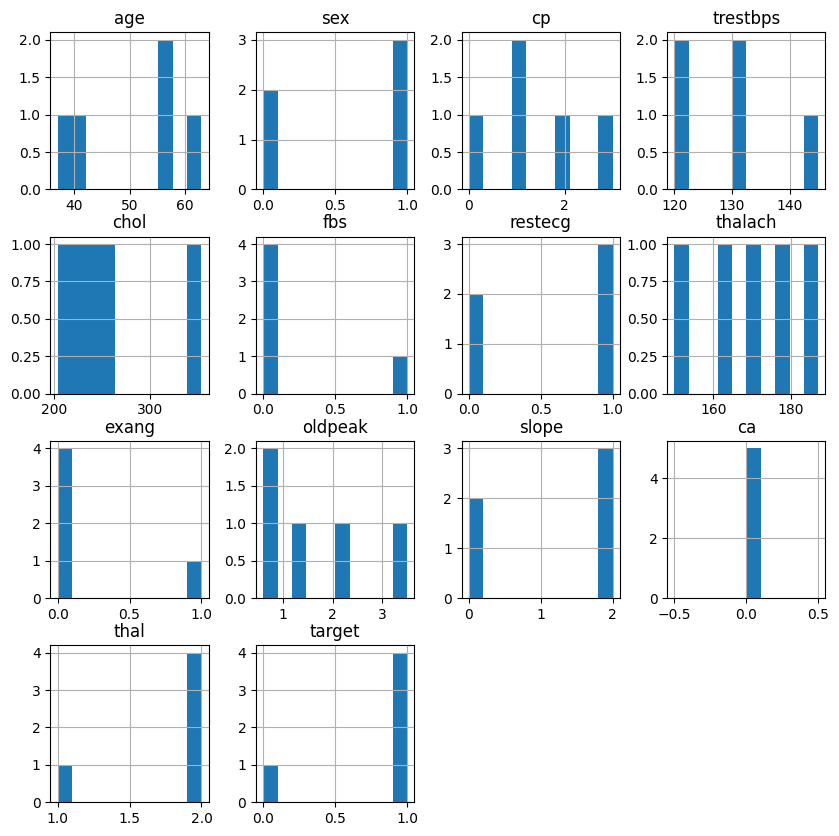


Plotting distribution for age:


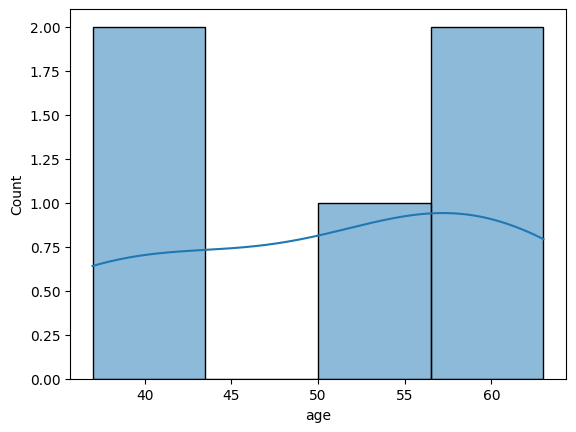


Plotting distribution for sex:


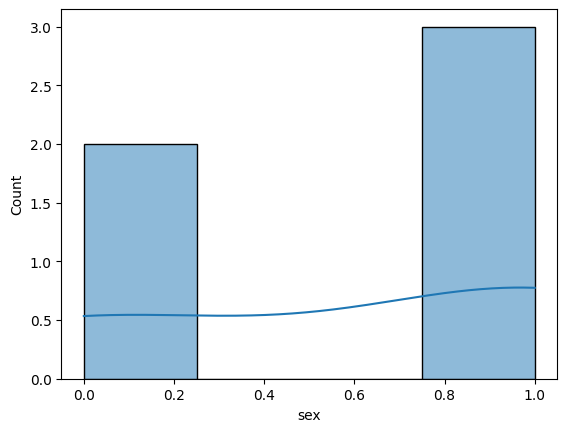


Plotting distribution for cp:


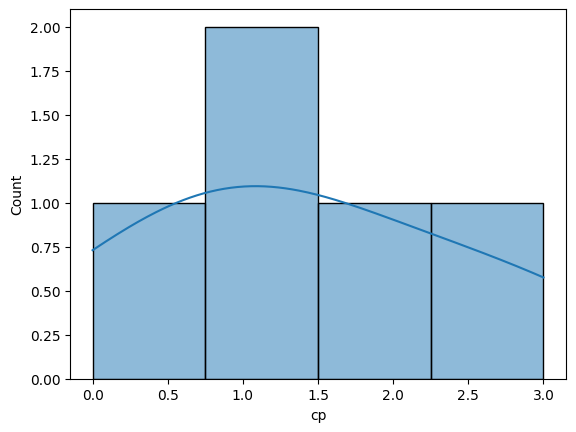


Plotting distribution for trestbps:


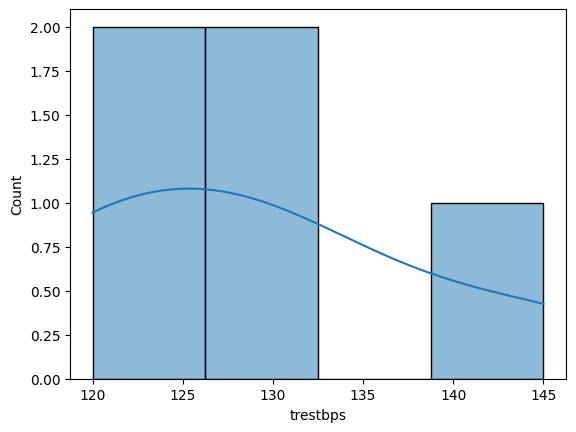


Plotting distribution for chol:


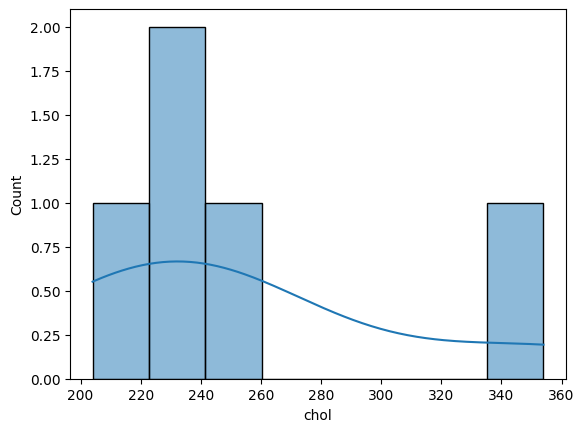


Plotting distribution for fbs:


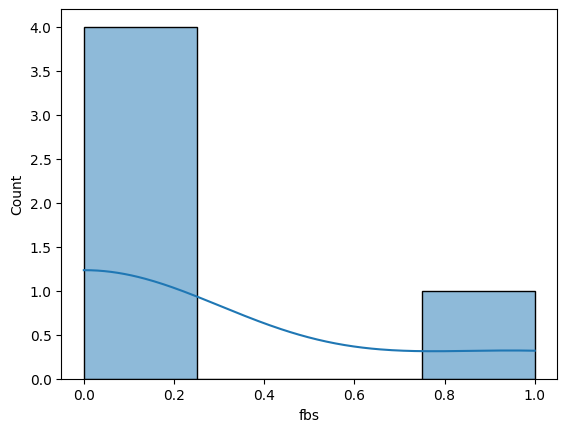


Plotting distribution for restecg:


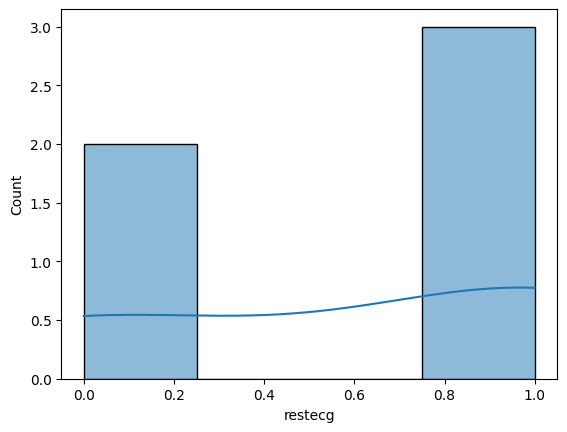


Plotting distribution for thalach:


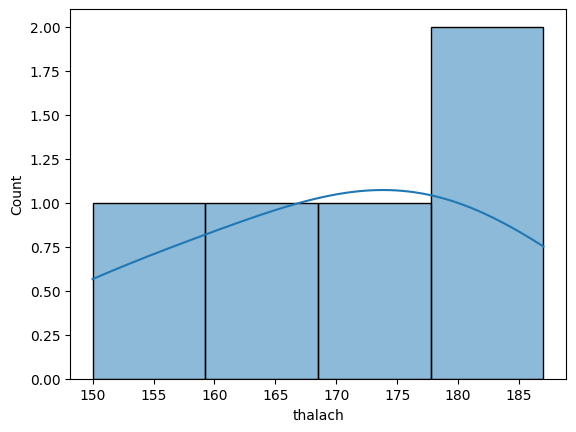


Plotting distribution for exang:


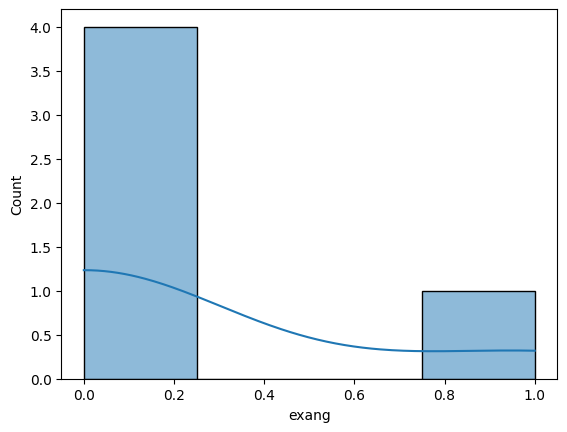


Plotting distribution for oldpeak:


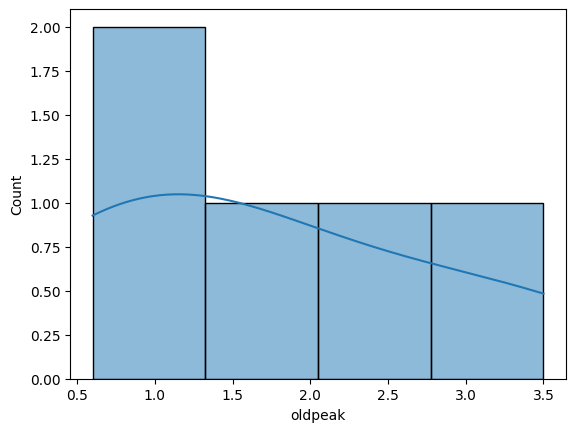


Plotting distribution for slope:


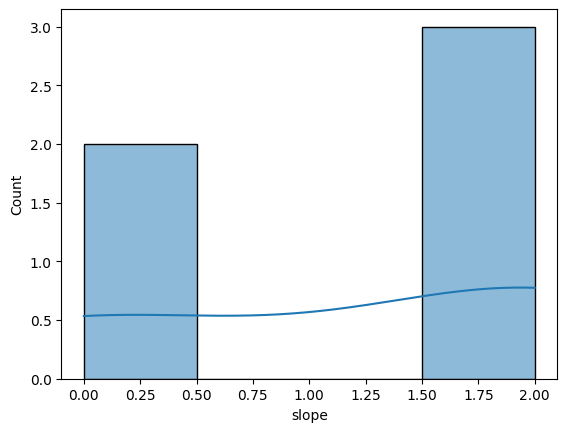


Plotting distribution for ca:


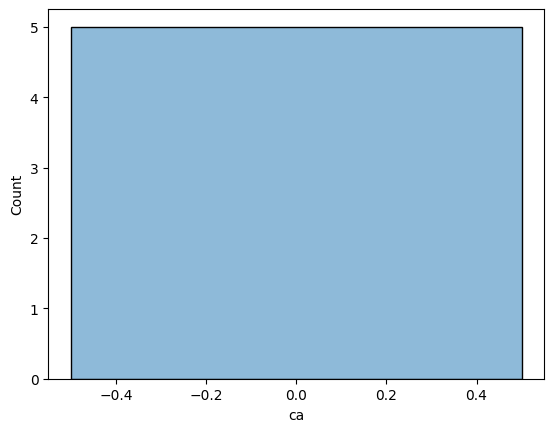


Plotting distribution for thal:


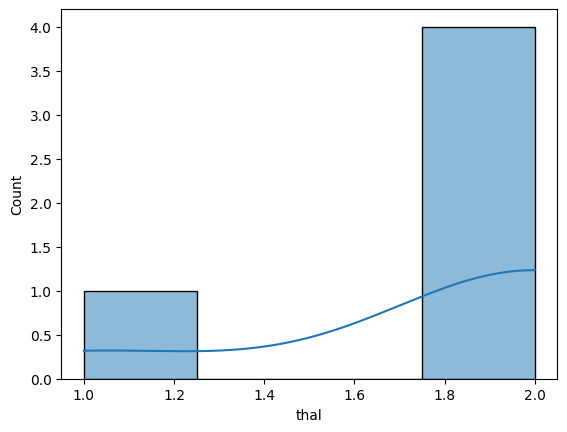


Plotting distribution for target:


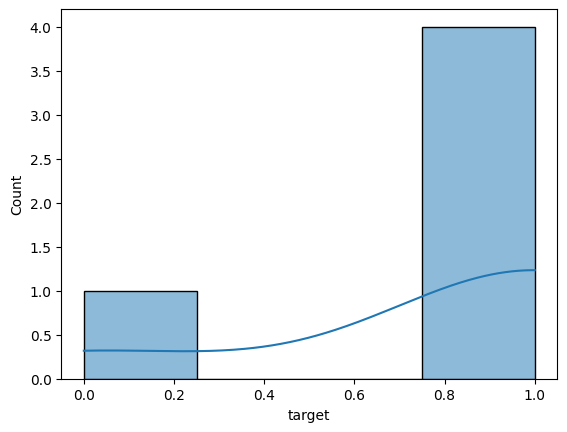


Plotting boxplot for age:


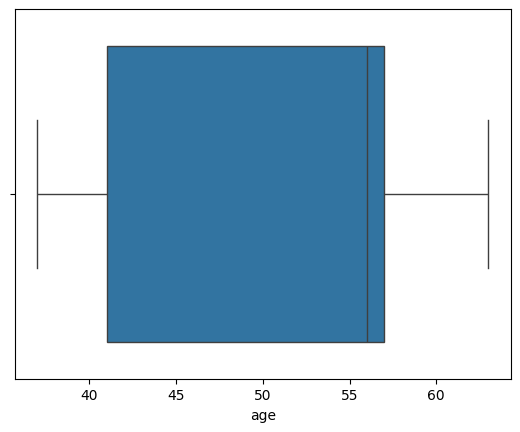


Plotting boxplot for sex:


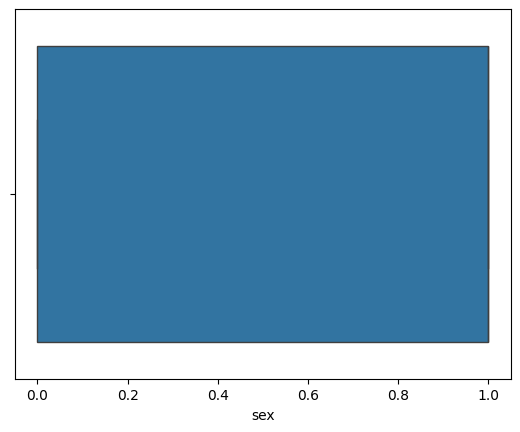


Plotting boxplot for cp:


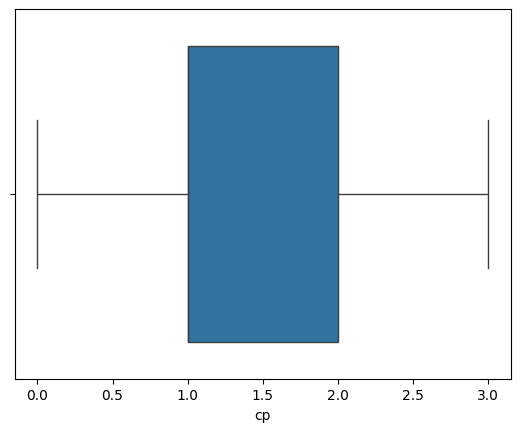


Plotting boxplot for trestbps:


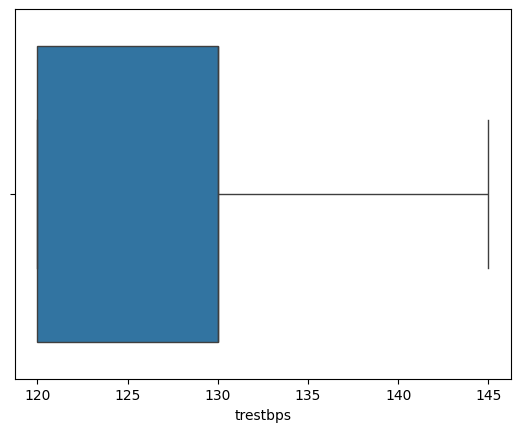


Plotting boxplot for chol:


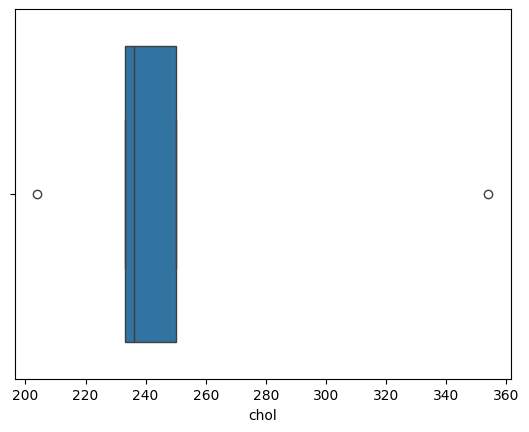


Plotting boxplot for fbs:


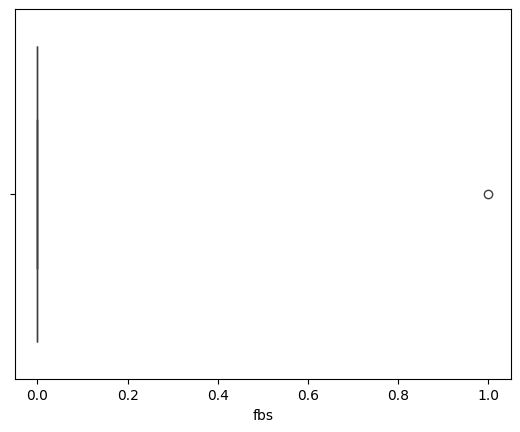


Plotting boxplot for restecg:


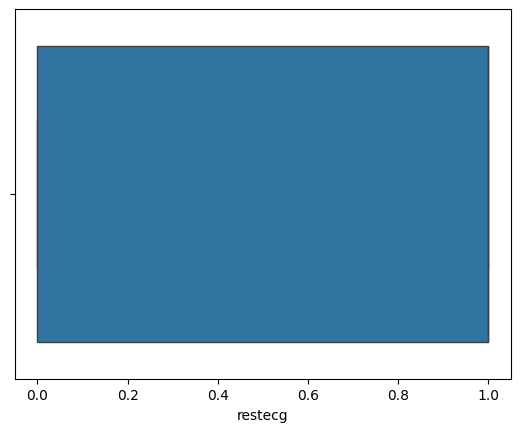


Plotting boxplot for thalach:


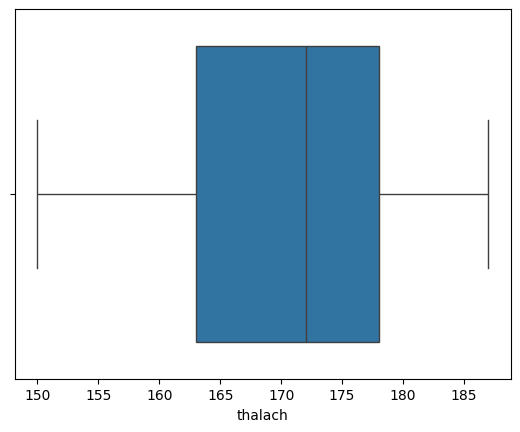


Plotting boxplot for exang:


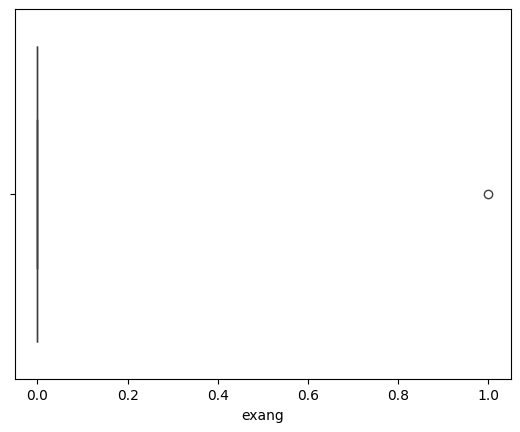


Plotting boxplot for oldpeak:


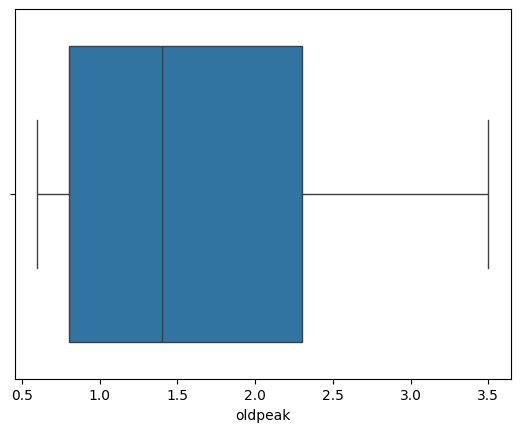


Plotting boxplot for slope:


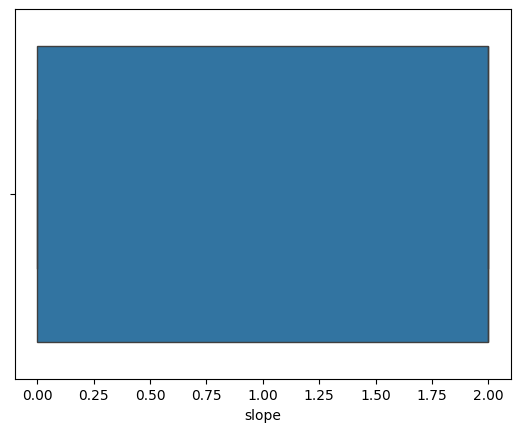


Plotting boxplot for ca:


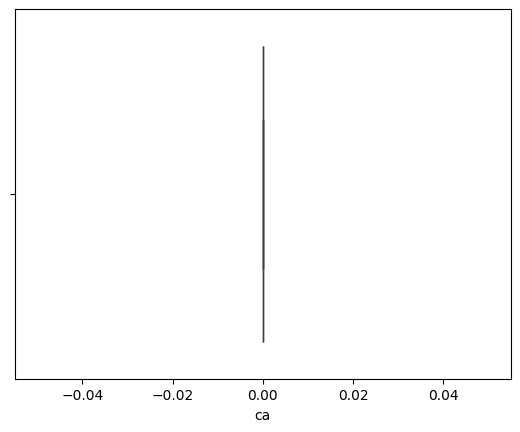


Plotting boxplot for thal:


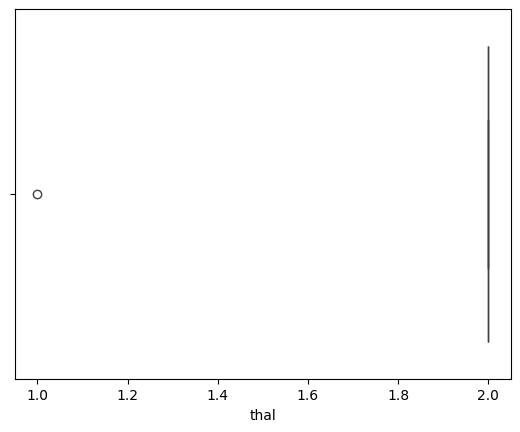


Plotting boxplot for target:


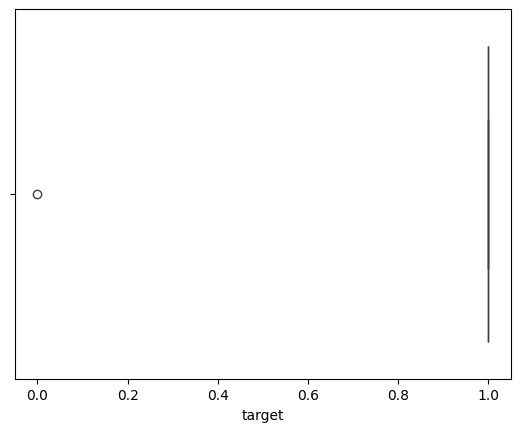


Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.146852  0.086222  0.150450  0.316289  0.609513   
sex       0.146852  1.000000  0.720577  0.356348 -0.374021  0.408248   
cp        0.086222  0.720577  1.000000  0.898717 -0.566430  0.784465   
trestbps  0.150450  0.356348  0.898717  1.000000 -0.477782  0.872872   
chol      0.316289 -0.374021 -0.566430 -0.477782  1.000000 -0.217394   
fbs       0.609513  0.408248  0.784465  0.872872 -0.217394  1.000000   
restecg  -0.097901  0.166667 -0.480384 -0.757240  0.584804 -0.612372   
thalach  -0.786992  0.160773 -0.247144 -0.532807 -0.181009 -0.787621   
exang     0.309752 -0.612372 -0.686406 -0.490990  0.956923 -0.250000   
oldpeak  -0.487791  0.550212  0.745216  0.594328 -0.358753  0.271419   
slope     0.065268 -0.666667 -0.880705 -0.757240  0.220292 -0.612372   
ca             NaN       NaN       NaN       NaN       NaN       NaN   
thal     -0.609513 -0.408248 -0.784465 -0.8

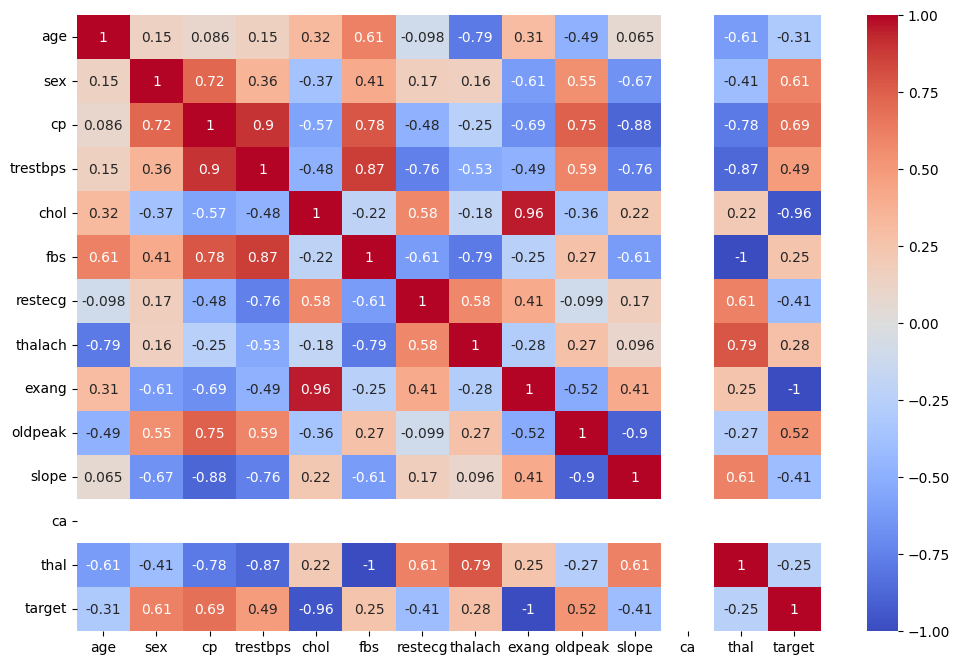


Pair plot to visualize relationships between variables:


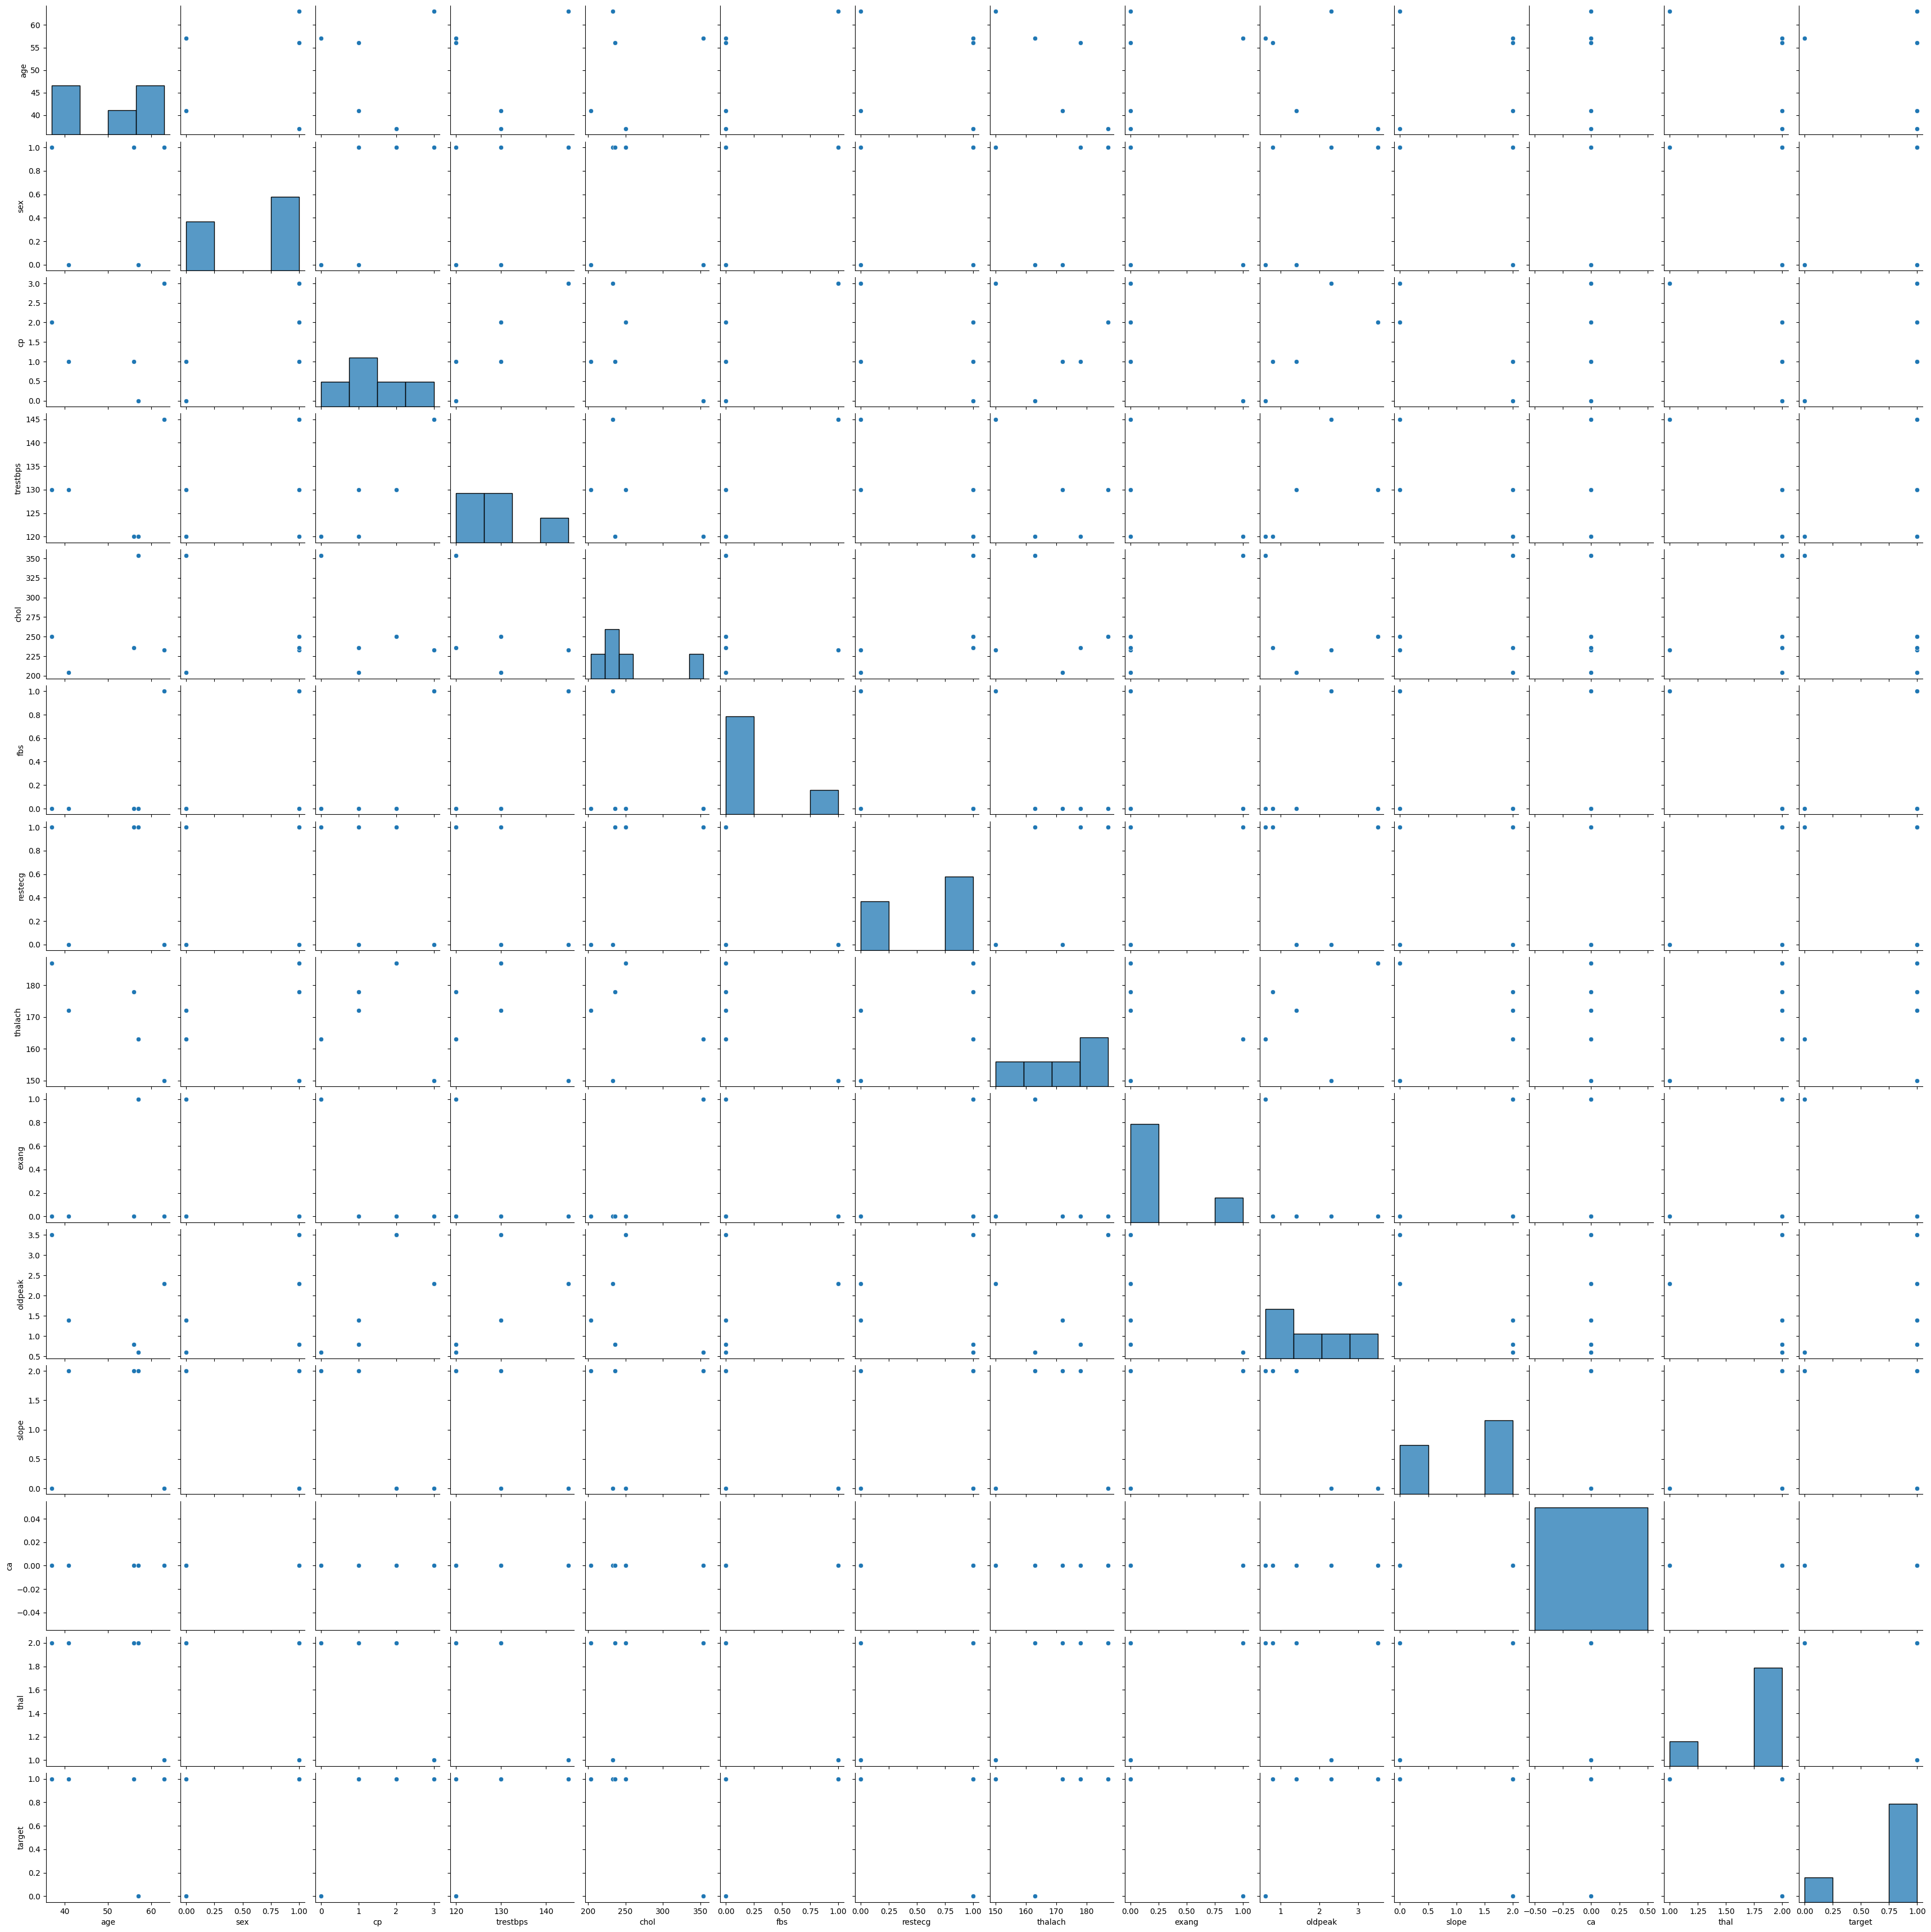

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\mohan\Downloads\heart.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nSummary of the dataset:")
df.info()

# Get descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values
df_clean = df.dropna()

# Generate meaningful features (if applicable, otherwise skip this step)

# Select numeric features and standardize them
numeric_features = df_clean.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Explained variance ratio by each component
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
print(pca_df.head())

# Assume 'target' is the column you want to predict
X = df_clean.drop(['target'], axis=1)
y = df_clean['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot distributions of numerical variables
print("\nPlotting distributions of numerical variables:")
df_clean.hist(figsize=(10, 10))
plt.show()

for column in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nPlotting distribution for {column}:")
    sns.histplot(df_clean[column], kde=True)
    plt.show()

for column in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nPlotting boxplot for {column}:")
    sns.boxplot(x=df_clean[column])
    plt.show()

print("\nCorrelation matrix:")
correlation_matrix = numeric_features.corr()
print(correlation_matrix)

print("\nHeatmap of the correlation matrix:")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

print("\nPair plot to visualize relationships between variables:")
sns.pairplot(numeric_features)
plt.show()
